Problem: - We need to write a program to find the position of a given number in a list of numbers arranged in 
decreasing order. We also need to minimize the number of times we access elements from the list.

**1. Define all Inputs and Outputs:**
**Input: -** 
1. cards: - The input will be some kind of list or array of numbers represented in decreasing order.
2. query: - A number, whose position in the array is to be determined. E.g 7

**Output: -** 
1. position: - The position of the given number and the lowest number of times it took to get to this position.

Based on this we can now create the signature of our function

In [ ]:
def locate_card(cards,query):
    pass

**Come up with some example inputs & outputs. Try to cover all edge cases.**
Before we start implementing the function, it would be useful to come up with some example inputs and outputs which we can use later to test out problem. We'll refer to them as *test cases*.

In [ ]:
cards = [20,18,15,10,7,6,3,2,1]
query = 7
output = 4

We can test our function by passing the inputs into function and comparing the result with the expected output

In [ ]:
result = locate_card(cards,query)
print(result)

In [ ]:
result == output

Going forward every test case will be represented as a dictionary

In [ ]:
test = {
    'input':{
        'cards': [13,11,10,7,4,3,1,0],
        'query': 7
    },
    'output' : 3
}

The function can now be tested as follows

In [ ]:
#putting ** will take the keys from the dictionary and put values as arguments
locate_card(**test['input']) == test['output']

**2. Our function should be able to handle any set of valid inputs we pass into it. Here's a list of possible variations we might encounter:**

1. The number ```query``` occurs somewhere in the middle of the list ```cards```.
2. ```query``` is the first element in ```cards```.
3. ```query``` is the last element in ```cards```.
4. The list ```cards``` contains just one element, which is ```query```.
5. The list ```cards``` contains just one element, which is not ```query```.
6. The list ```cards``` does not contain ```query``` element. We will return -1 (don't make assumption, just confirm with someone)
7. The list ```cards``` is empty. We will return -1 (don't make assumption, just confirm with someone)
8. The list ```cards``` contains repeating numbers.
9. The number ```query``` occurs at more than one position in ```cards```.

Now, let's create all the test cases

In [ ]:
# create an empty list
tests = []

In [ ]:
# query occurs in the middle
tests.append({
    'input' : {
        'cards': [13,11,10,7,4,3,1,0],
        'query': 7
    },
    'output' : 3
})

In [ ]:
# query is the first element
tests.append({
    'input' : {
        'cards': [4,2,1,-1],
        'query': 4
    },
    'output' : 0  
})

In [ ]:
# query is the last element
tests.append({
    'input' : {
        'cards' : [3,-1,-9,-126,-127],
        'query' : -127
    },
    'output' : 4
})

In [ ]:
# cards contains just one element, query
tests.append({
    'input' : {
        'cards' : [6],
        'query' : 6
    },
    'output' : 0
})

In [ ]:
# cards does not contain query
tests.append({
    'input' : {
        'cards' : [9,7,5,2,-9],
        'query' : 4
    },
    'output' : -1
})

In [ ]:
# cards is empty
tests.append({
    'input' : {
        'cards' : [],
        'query' : 4
    },
    'output' : -1
})

In [ ]:
# numbers can repeat in cards
tests.append({
    'input' : {
        'cards' : [8,8,6,6,6,6,3,2,2,2,2,0,0],
        'query' : 3
    },
    'output' : 6
})

In [ ]:
# query occurs multiple times
tests.append({
    'input' : {
        'cards' : [8,8,6,6,6,6,3,2,2,2,2,0,0],
        'query' : 6
    },
    'output' : 2
})

Let's look at the full set of test cases we have created so far.

In [ ]:
tests

**3. Come up with a correct solution for the problem. State it is plain english**

In the problem, we can simply turn over cards in order one by one, till we find the card with the qiven number on it. Here is how we can implement:
1. Create a variable ```position``` with the value 0.
2. Check whether the number at index ```position``` in ```cards``` is equal to ```query```.
3. If it does, ```position``` is the answer.
4. If not, increment the value of ```position``` by 1, and repeat step 2 to 5 till we reach the last ```position```
5. If the number was not found, return -1

**Linear Search Algorithm:** Congratulations, we've just written our first algorithm! 
An algorithm is simply a list of statements which can be converted into code and executed by a computer
on different sets of inputs. This particular algorithm is called linear search, since it involves searching
through a list in a linear fashion.

**4. Implement the solution and test it using example inputs. Fix bugs if any**

In [ ]:
def locate_card_linearsearch(cards,query):
    # Create a variable position with initial value 0
    position = 0
    # Iterate over the list of cards
    if cards == []:
        # If the current card equals the query, return position
        return -1
    else:
        for i in cards:
            if i == query:
                # If the current card equals the query,
                return position
            else:
                # Otherwise, increment position by 1
                position += 1
        # If we've reached here, we didn't find the query
        return -1

In [ ]:
print(locate_card_linearsearch(**tests[0]['input']) == tests[0]['output'])
print(locate_card_linearsearch(**tests[1]['input']) == tests[1]['output'])
print(locate_card_linearsearch(**tests[2]['input']) == tests[2]['output'])
print(locate_card_linearsearch(**tests[3]['input']) == tests[3]['output'])
print(locate_card_linearsearch(**tests[4]['input']) == tests[4]['output'])
print(locate_card_linearsearch(**tests[5]['input']) == tests[5]['output'])
print(locate_card_linearsearch(**tests[6]['input']) == tests[6]['output'])
print(locate_card_linearsearch(**tests[7]['input']) == tests[7]['output'])

To help us test out functions easily the ```jovian``` Python library provides a helper function ```evaluate_test_case```. Apart from checking whether the function produces the expected result, it also displays the input, expected output, actual output from the function, and the execution time of the function   

In [ ]:
%pip install jovian --upgrade --quiet

In [ ]:
from jovian.pythondsa import evaluate_test_cases, evaluate_test_case

In [ ]:
evaluate_test_cases(locate_card_linearsearch, tests)

**5. Analyze the algorithm's complexity and identiy inefficiencies, if any.**
Since we access the list element once in every iterations, for a list of size ```N``` we access the elements from the list up to ```N``` times. Thus, we may need to overturn up to ```N``` cards in the worst case, to find the required card. 

Suppose we are allowed to overturn 1 card per minute, it may take 30 minutes to find the required card if the list contains 30 cards. 

The field of study concerned with finding the amount of time, space or other resources required to complete the execution of computer programs is called the *analysis of algorithm*. And the process of figuring out the best algorithm to solve a given problem is called *algorithm design and optimization.*


**Complexity & Big O Notations**

Complexity of an algorithm is a measure of the amount of time and/or space required by an algorithm for an input
of a given size e.g. ```N```. Unless otherwise stated, the term *Complexity* always refer to the worst case.

In the case of Linear Search:

1. The *Time Complexity* of the algorithm is ```cN``` for some fixed constant ```c``` that depends on the number of operations we perform in each iteration and the time taken to execute a statement. Time complexity is sometimes also called the *running time* of the algorithm.
2. The *Space Complexity* is some constant ```c'``` (independent of ```N```), since we just need a single variable ```position``` to iterate through the array, and it occupies a constant space in the computer's memory(RAM).

    **Big O Notation:** Worst-case complexity is often expressed using the Big O Notation. In the Big O, we drop fixed constants and lower powers of variables to capture the trend of relationship between the size of the input and the complexity of the algorithm i.e. If the complexity of the algorithm is ```cN^3 + dN^2 + eN + f```, in the Big O notation it is expressed as **```O(N^3)```**

Therefore in our example, the time complexity of Linear Search algorithm is **```O(N)```** as we dropped the constant ```c``` and the space complexity is **```O(1)```** as we dropped the constant ```c'```.


**6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.**

In the previous steps we used *brute force* approach to check for each number ```N``` in the given list. We didn't utilize the fact that the list is ordered. 

Given that the list is sorted in decreasing order, what if we pick a number ```N``` at a random ```position``` and if that number if greater than our ```query``` number than it means that all the other cards before this ```position``` are also greater and therefore we don't need to look into those numbers. 

So the best approach is to just pick the ```middle_position``` and check against our ```query``` number. If it is greater we can eliminate all the numbers before the ```middle_position``` and only look into the number after the ```middle_position```. We can repeat this again with the remaining list. This Technique is called **Binary Search**.

**7. Come up with a correct solution for the problem. State it in plain english.**
Here's how Binary Search can be applied to our problem:
1. Get the full length - 1```full_len - 1``` of the list and create 2 variables that will hold the starting index position ```low``` and highest index position ```high```.
2. Compare the ```low <= high``` then,
3. Find the ```mid``` position of the list by ```(low + high) // 2```.
4. Then compare the ```mid_number``` with the ```query``` value.
5. Then check if the ```mid >= 0``` and the number just left to mid is equal to query. i.e, ```cards[mid - 1] = query```, then return ```left``` or else ```found```.
6. If it doesn't match than check if ```middle_number < query```, then go ```left``` else ```right```.
7. If we have to go ```left``` then ```high = mid_position - 1``` and if we have to go ```right``` then ```low = mid + 1```
8. If it still doesn't find a match return -1.

**8. Implement the Binary Search Algorithm.**

In [ ]:
def test_location(cards, query, mid):
    mid_number = cards[mid]     #1st operation, 1 variable
    if mid_number == query:     #2nd operation
        if mid-1 >= 0 and cards[mid-1] == query:    #3rd operation
            return 'left'
        else:
            return 'found'
    elif mid_number < query:    #4th operation
        return 'left'
    elif mid_number > query:    #5th operation
        return 'right'

def locate_cards_binarysearch(cards,query):
    low, high = 0, len(cards) - 1   #1st operation, 2 variables

    while low <= high:              #2nd operation
        mid = (low + high) // 2     #3rd operation, 1 variable
        print(f"low is: {low}, high is: {high}, mid is: {mid}")
        result = test_location(cards, query, mid)   #4th operation, 1 variable
        if result == 'found':       #5th operation
            return mid  
        elif result == 'left':      #6th operation
            high = mid - 1          #7th operation
        elif result == 'right':
            low = mid + 1           #8th operation
    return -1



In [ ]:
#Add new Test Cases:
tests.append({
    'input' : {
        'cards' : [8,8,6,6,6,6,6,6,6,6,6,6,3,2,2,2,2,0,0],
        'query' : 6
    },
    'output' : 2
})

In [ ]:
evaluate_test_cases(locate_cards_binarysearch, tests)

**9. Analyze the Binary Search Algorithm's Complexity and Identify inefficiencies, if any**

Once again, let's try to count the number of iterations in the algorithm. If we start with an array of ```N``` elements, then each time the size of the array reduces to half for the next iteration, until we are left with 1 element.

Initial Length = ```N```

After Iteration 1 we have ```N/2```
After Iteration 2 we have ```(N/2)/2``` = ```N/2^2``` = ```N/4```
After Iteration 3 we have ```(N/4)/2``` = ```N/8```   = ```N/2^3```
.
.
.
Therefore, after Iteration K we will have ```N/2^k```

So, if we compare this equation to 1 we get ```N/2^k = 1```, which is ```N = 2^k```, which is ```log N = k``` where ```log``` is of base 2.

Therefore, our Binary Search algorithm has a time complexity of **O(logN)** and space complexity of **O(1)** because in any given iteration we only need 5 variables (low, high, mid & mid_number) to store constant values, we can generalize to 1.


**Binary Search vs Linear Search**

In [ ]:
# Create a Larger Test Case
large_test = {
    'input': {
        'cards': list(range(10000000,0, -1)),
        'query': 2
    },
    'output': 9999998
}

In [ ]:
result, passed, runtime = evaluate_test_case(locate_card_linearsearch, large_test)
print(f"Search Result: {result}, Passed: {passed}, Runtime: {runtime}")

In [ ]:
result, passed, runtime = evaluate_test_case(locate_cards_binarysearch, large_test)
print(f"Search Result: {result}, Passed: {passed}, Runtime: {runtime}")

The binary search version is over 6800 times faster than linear search. This is the real difference between **O(N)** and **O(log N)**.
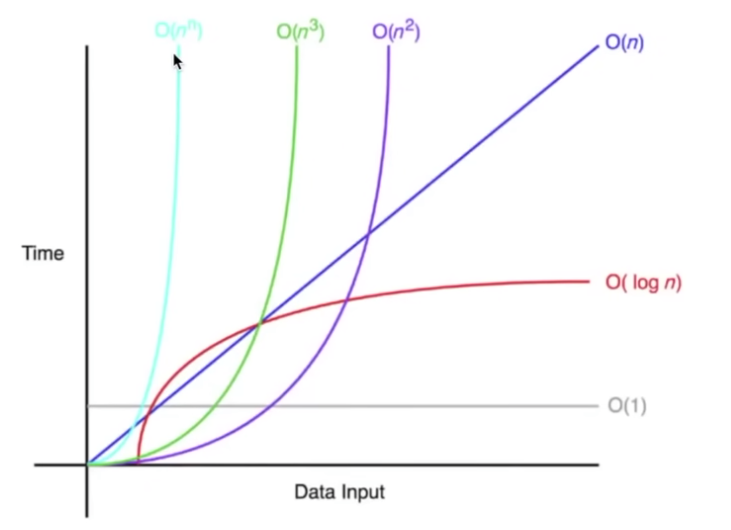

**Let us write a Genric Binary Search Algorithm:**

In [ ]:
def binary_search(low, high, condition):
    # To-Do: add some docs
    while low <= high:
        mid = (low + high) // 2
        result = condition(mid)
        if result == 'found':
            return mid 
        elif result == 'left':
            high = mid - 1
        elif result == 'right':
            low = mid + 1
    return -1


In [ ]:
def locate_cards(cards, query):
    # This is the condition function we pass to binary_search. This is a feature in Python called Closures. 
    # Which is, a function defined inside another function can access variables from the outer function.
    # The inner function can acess the variables within the outer function, even after the outer function has returned.
    def condition(mid):
        mid_number = cards[mid]
        if mid_number == query:
            if mid-1 >= 0 and cards[mid-1] == query:
                return 'left'
            else:
                return 'found'
        elif mid_number < query:
            return 'left'
        elif mid_number > query:
            return 'right'
    return binary_search(0, len(cards)-1, condition)   

In [ ]:
# Test the new function with the same test cases
evaluate_test_cases(locate_cards, tests)

The ```binary_search``` function can now be used to solve other problems too. It is a tested piece of logic.

**Question:** Given an array of integers nums sorted in ascending order find the starting and ending position of a given number.

This differs from the problem in only two significant ways:
1. The numbers are sorted in increasing order. e.g. [1,3,5,7,8,9,9,10,11,24,27,30,30,40]
2. We are looking for both the increasing order and descreasing order.

In [ ]:
def first_position(nums, target):
    def condition(mid):
        mid_number = nums[mid]
        if mid_number == target:
            if mid > 0 and nums[mid-1] == target:
                return 'left'
            else:
                return 'found'
        elif mid_number < target:
            return 'right'
        else:
            return 'left'
    return binary_search(0, len(nums)-1, condition)

def last_position(nums, target):
    def condition(mid):
        mid_number = nums[mid]
        if mid_number == target:
            if mid < len(nums) - 1 and nums[mid+1] == target:
                return 'right'
            else:
                return 'found'
        elif mid_number < target:
            return 'right'
        else:
            return 'left'
    return binary_search(0, len(nums)-1, condition)

def first_last_occurence(nums, target):
    return [first_position(nums, target), last_position(nums, target)]

In [ ]:
nums = [1,2,3,3,3,3,3,3,3,3,3,3,3,3,4,5,6,7,8,9]
first_last_occurence(nums, 3)

**ASSIGNMENT 1**

You are given a list of numbers, obtained by rotating a sorted list an unknown number of times. Write a function to determine the minumin number of times the original sorted list was rotated to obtain the given list. Your function should have the worst-case complexity of **O(log N)**, where ```N``` is the length of the list. You can assume that all the numbers in the list are unique.

Example: The list ```[5,6,9,0,2,3,4]``` was obtained by rotating the sorted list ```[0,2,3,4,5,6,9]``` 3 times.

We define "rotating a list" as removing the last element of the list and adding it before the first element. E.g rotating the list ```[3,2,4,1]``` produces ```[1,3,2,4]```. 

"Sorted list" refers to a list where the elements are arranged in the increasing order e.g ```[1,3,5,7]```

**Define Problem**
1. Problem in my words: - We are given a list ```nums``` which is generated from a sorted (increasing order) list but we don't know how many times the rotation took place to get this list ```nums```. Our job is to write a python function to determine the number of times the rotation needs to happen in order to get the list ```nums```. Rotation is defined as moving last element from the list to first position.
2. Inputs are: - a list ```nums```
3. Outputs are: - a single number ```num_rotaions``` that will tell us how many number of times the rotations happend on the original sorted list.

In [ ]:
#**Create Test Cases:**

test_cases_for_rotation_problem = []

#1. If the rotation only happened once
test_cases_for_rotation_problem.append({
    'input' : {'nums': [7,0,2,3,4,5,6]},
    'output' : 1
})
#2. If the rotation never happened
test_cases_for_rotation_problem.append({
    'input' : {'nums': [0,2,3,4,5,6,7]},
    'output' : 0
})
#3. If the rotation happened twice
test_cases_for_rotation_problem.append({
    'input' : {'nums': [7,6,0,2,3,4,5]},
    'output' : 2
})
#4. If the rotation happened more than twice
test_cases_for_rotation_problem.append({
    'input' : {'nums': [7,6,5,0,2,3,4]},
    'output' : 3
})
#5. If the rotation happend till the last number
test_cases_for_rotation_problem.append({
    'input' : {'nums': [7,6,5,4,3,2,1,0]},
    'output' : 7
})

**Create a Solution:**
1. Check the first number with the second number in the list.
2. If the first number is smaller than the second number then return 0.
3. If the first number is greater than the second number then go ahead.
4. Check the second number with the third number.
5. If the second number is smaller than first number and larger than third number then increment by 1 and go ahead.
6. Repeat step 5 until you a point where the middle number is smaller than middle-1 number and middle+1 number. Return the position of this middle number.
7. In this process if we reach a point where the middle+1 number if the last number (len(nums)-1) and if that number is smaller than middle number than return len(nums)

In [ ]:
def num_of_rotations_linearsearch(nums):
    low, high = 0, len(nums) - 1
    while low<=high:
        print(low, high)
        if low == 0:
            if nums[low] < nums[low+1]:
                return 0
            else:
                low = low + 1
        elif low != 0 and low != high:
            if nums[low] < nums[low-1] and nums[low] > nums[low+1]:
                low = low + 1
            elif nums[low] < nums[low-1] and nums[low] < nums[low+1]:
                return low
        elif low == high:
            if nums[low] < nums[low-1]:
                return low
            else:
                return low


In [ ]:
evaluate_test_cases(num_of_rotations_linearsearch, test_cases_for_rotation_problem)

In [ ]:
def num_of_rotations_binarysearch(nums):
    low, high = 0, len(nums) - 1
    def condition(mid):
        print(low, high, mid)
        if mid == 0:
            return 'found'
        elif mid != 0 and mid != high:
            if nums[mid] < nums[mid-1] and nums[mid] > nums[mid+1]:
                return 'right'
            elif nums[mid] < nums[mid-1] and nums[mid] < nums[mid+1]:
                return 'found'
            elif nums[mid] > nums[mid-1] and nums[mid] < nums[mid+1]:
                return 'left'
        elif mid == high:
            if nums[mid] < nums[mid-1]:
                return 'found'
            else:
                return 'right'
    return binary_search(low, high, condition)

In [ ]:
evaluate_test_cases(num_of_rotations_binarysearch, test_cases_for_rotation_problem)